- **hotel_address** — адрес отеля;

- **review_date** — дата, когда рецензент разместил соответствующий отзыв;

- **average_score** — средний балл отеля, рассчитанный на основе последнего комментария за последний год;

- **hotel_name** — название отеля;

- **reviewer_nationality** — страна рецензента;

- **negative_review** — отрицательный отзыв, который рецензент дал отелю;

- **review_total_negative_word_counts** — общее количество слов в отрицательном отзыв;

- **positive_review** — положительный отзыв, который рецензент дал отелю;

- **review_total_positive_word_counts** — общее количество слов в положительном отзыве.

- **reviewer_score** — оценка, которую рецензент поставил отелю на основе своего опыта;

- **total_number_of_reviews_reviewer_has_given** — количество отзывов, которые рецензенты дали в прошлом;

- **total_number_of_reviews** — общее количество действительных отзывов об отеле;

- **tags** — теги, которые рецензент дал отелю;

- **days_since_review** — количество дней между датой проверки и датой очистки;

- **additional_number_of_scoring** — есть также некоторые гости, которые просто поставили оценку сервису, но не оставили отзыв. Это число указывает, сколько там действительных оценок без проверки.

- **lat** — географическая широта отеля;

- **lng** — географическая долгота отеля.

## Последовательность работ

0. Подгрузка данных

1. Анализ признаков. Преобразование категориальных признаков. Заполнение пропусков.

2. Создание новых признаков. Создание столбцов с данными из существующих данных или с использованием внешних источников. Например использование **One-Hot Encoding**

3. Преобразование признаков. Применим различные преобразования над признаками вроде нормалищации, стандартизации (**skelearn.preprocessing.StandartScaler**)

4. Отбор признаков. Используем анализ мультиколлинеарности (**pnadas.Datafarame.corr**) и значимости признаков (**тесты chi2 и f_classif**) как шаг отбора признаков для модели.


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce 

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

## Раздел 0. Подгрузка данных

In [36]:
hotels_df = pd.read_csv('data/hotels.csv')
hotels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [63]:
hotels_df.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng,mask,country,city,tags_n
0,Stratton Street Mayfair Westminster Borough Lo...,581,2016-02-19,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,...,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531,51.507894,-0.143671,"[London, W1J, 8LT, United, Kingdom]",United Kingdom,London,"[Leisure trip, Couple, Studio Suite, Stayed 2 ..."
1,130 134 Southampton Row Camden London WC1B 5AF...,299,2017-01-12,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,...,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203,51.521009,-0.123097,"[London, WC1B, 5AF, United, Kingdom]",United Kingdom,London,"[Business trip, Couple, Standard Double Room, ..."
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,2016-10-18,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,...,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289,48.845377,2.325643,"[6th, arr, 75006, Paris, France]",France,Paris,"[Leisure trip, Solo traveler, Modern Double Ro..."
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,2015-09-22,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,...,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681,48.888697,2.394540,"[19th, arr, 75019, Paris, France]",France,Paris,"[Leisure trip, Solo traveler, Standard Room wi..."
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,2016-03-05,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,...,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516,52.385601,4.847060,"[1, 1014, AG, Amsterdam, Netherlands]",Netherlands,Amsterdam,"[Business trip, Couple, Standard Double or Twi..."


### 0.1. Проверим наличие дубликатов

In [37]:
dupl_columns = list(hotels_df.columns)

mask = hotels_df.duplicated(subset=dupl_columns)
h_duplicates = hotels_df[mask]
print(f'Число найденных дубликатов: {h_duplicates.shape[0]}')

Число найденных дубликатов: 307


### 0.1. Удалим дубликаты

In [ ]:
# Удаление дубликатов
hotels_df = hotels_df.drop_duplicates(subset=dupl_columns)

## Выводы по разделу 0:

- **Имеем пропуски в координатах отелей:** *lat и lng* 

- **Имеем 8 признаков формата object:** именно с этими признаками (по большей части) мы и будем работать

## Раздел 1. Анализ признаков. Преобразование категориальных признаков. Заполнение пропусков.

### 1.1. Вполним преобразование признака *days_since_review* в числовой

In [39]:
# Функция преобразования
def day_func(days):
    day = int(days.split(' ')[0])
    return day

# Выполнение функции
hotels_df['days_since_review'] = hotels_df['days_since_review'].apply(day_func)
    

### 1.2. Выполним преобразование признака *review_date* в формат *datetime*

In [40]:
hotels_df['review_date'] = pd.to_datetime(hotels_df['review_date'], dayfirst=True)

### 1.3. Проверяем пропуски координат отеля

In [41]:
#Поиск пропущенных значений в признаках lng и lat (скорее всего пропущены оба признака сразу)
mask = hotels_df[(hotels_df['lat'].isna() == True) | (hotels_df['lng'].isna() == True)]
mask.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2448 entries, 122 to 386764
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   hotel_address                               2448 non-null   object        
 1   additional_number_of_scoring                2448 non-null   int64         
 2   review_date                                 2448 non-null   datetime64[ns]
 3   average_score                               2448 non-null   float64       
 4   hotel_name                                  2448 non-null   object        
 5   reviewer_nationality                        2448 non-null   object        
 6   negative_review                             2448 non-null   object        
 7   review_total_negative_word_counts           2448 non-null   int64         
 8   total_number_of_reviews                     2448 non-null   int64         
 9   positive_

**Имеем 2448 пропусков. Проверим количество отелей, координаты которых отсутствуют**

In [42]:
mask['hotel_name'].unique().shape[0]

17

**Имеем всего 17 отелей. Уточнить данную информацию по 17 отелям не займет много времени**

In [43]:
# Название отелей, с отсутсвием координат

mask['hotel_name'].unique()

array(['Austria Trend Hotel Schloss Wilhelminenberg Wien',
       'Holiday Inn Paris Montmartre',
       'Fleming s Selection Hotel Wien City', 'Hotel Atlanta',
       'Maison Albar Hotel Paris Op ra Diamond',
       'Derag Livinghotel Kaiser Franz Joseph Vienna',
       'Hotel City Central', 'NH Collection Barcelona Podium',
       'City Hotel Deutschmeister', 'Hotel Daniel Vienna', 'Roomz Vienna',
       'Hotel Pension Baron am Schottentor',
       'Mercure Paris Gare Montparnasse', 'Hotel Park Villa',
       'Hotel Advance', 'Renaissance Barcelona Hotel',
       'Cordial Theaterhotel Wien'], dtype=object)

### 1.4. Создадим датафрейм с именами отелей, добавим к ним координаты, которые мы найдем в интернете

In [44]:

nan_coordinates = pd.DataFrame({'hotel_name':['Austria Trend Hotel Schloss Wilhelminenberg Wien',
'Holiday Inn Paris Montmartre', 'Fleming s Selection Hotel Wien City',
'Hotel Atlanta', 'Maison Albar Hotel Paris Op ra Diamond',
'Derag Livinghotel Kaiser Franz Joseph Vienna', 'Hotel City Central',
'NH Collection Barcelona Podium', 'City Hotel Deutschmeister',
'Hotel Daniel Vienna', 'Roomz Vienna', 'Hotel Pension Baron am Schottentor',
'Mercure Paris Gare Montparnasse', 'Hotel Park Villa', 'Hotel Advance',
'Renaissance Barcelona Hotel', 'Cordial Theaterhotel Wien'],
                              
'lat':[48.229047, 48.888945, 48.897508, 48.220819, 48.877885, 
       48.246288, 48.213632, 48.214636, 48.222147, 48.188816, 
       48.222970, 48.216753, 48.838038, 46.991676, 28.103670, 41.392437, 48.209565], 

'lng':[16.284445, 2.333260, 2.207706, 16.356070, 2.324035, 16.341359, 
       16.379934, 16.380054, 16.366343, 16.383355, 16.393311, 16.359726, 
       2.318824, 3.154911, 113.013415, 2.167519, 16.351598]})


In [45]:
# Объединим таблицы

merged = hotels_df.merge(
    nan_coordinates,
    on='hotel_name',
    how='left'
)

# Перенесем все актуальные данные в один столбец (х)
values = {
    'lat_x': merged['lat_y'],
    'lng_x': merged['lng_y']
}

hotels_df = merged.fillna(values)


# Добавляем столбцы без индексов (х,y)
hotels_df['lat'] = hotels_df['lat_x']
hotels_df['lng'] = hotels_df['lng_x']

# Удаляем столбцы с индексами
hotels_df = hotels_df.drop(['lat_x', 'lat_y','lng_x', 'lng_y'], axis = 1)
hotels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386496 entries, 0 to 386495
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               386496 non-null  object        
 1   additional_number_of_scoring                386496 non-null  int64         
 2   review_date                                 386496 non-null  datetime64[ns]
 3   average_score                               386496 non-null  float64       
 4   hotel_name                                  386496 non-null  object        
 5   reviewer_nationality                        386496 non-null  object        
 6   negative_review                             386496 non-null  object        
 7   review_total_negative_word_counts           386496 non-null  int64         
 8   total_number_of_reviews                     386496 non-null  int64        

### 1.5 Создаём признаки с указанием страны и города отеля

In [46]:
# Функция split - разделяем строку, вычленяем город и страну отеля

def split(address):
    address = address.split(' ')[-5:]
    return address

#Временный столбец с занесением данных
hotels_df['mask'] = hotels_df['hotel_address'].apply(split)

In [47]:
# Функция country - для создания признака 'country'

def country(country):
    if country[-2] == 'United':
        return country[-2] + ' ' + country[-1]
    else:
        return country[-1]
hotels_df['country'] = hotels_df['mask'].apply(country)


In [48]:
# Функция сity - для создания признака 'city'

def city(city):
    if city[-2] == 'United':
        return city[-5]
    else:
        return city[-2]
    
hotels_df['city'] = hotels_df['mask'].apply(city)


**По итогу мы имеем 2 новых признака 'country' и 'city'**

### 1.6. Проверим структуру столбцов *negative_review - отрицательный отзыв* и *positive_review - положительный отзыв* 

In [49]:
mask_positive = hotels_df[hotels_df['negative_review'] == 'No Negative']
mask_negative = hotels_df[hotels_df['positive_review'] == 'No Positive']
print(mask_negative[['negative_review','positive_review']].head())
print(mask_positive[['negative_review','positive_review']].head())

                                      negative_review positive_review
2                                  No kettle in room      No Positive
9    I advised it was for my husbands birthday and...     No Positive
23   The view even thaught specially asked for a G...     No Positive
48   I requested for an extra power plug the recep...     No Positive
70   Location was good but outside view was bad We...     No Positive
   negative_review                                    positive_review
3      No Negative   Friendly staff quiet comfortable room spotles...
12     No Negative   Great location beautiful design very friendly...
14     No Negative                      Nice hotel very good location
15     No Negative   Very comfortable hotel close to metro located...
26     No Negative                                         Amazinging


**Можно заметить, что признаки с надписью 'No Positive'/No Negative являются взаимоисключающими ('No Negative' - имеет позитивный отзыв, 'No Positive' - имеет негативный отзыв), в разделе 2, мы это используем для создания числовых признаков на основе отзывов**

### 1.7. Выполним анализ признака *reviewer_nationality - страна резидента* 

In [50]:
hotels_df['reviewer_nationality'].value_counts()[:10]

reviewer_nationality
United Kingdom               183952
United States of America      26494
Australia                     16216
Ireland                       11119
United Arab Emirates           7612
Saudi Arabia                   6716
Netherlands                    6598
Switzerland                    6492
Canada                         5977
Germany                        5951
Name: count, dtype: int64

In [51]:
#Удалим пробелы в начале и конце строки

def stripping(s):
    s = s.strip()
    return s
hotels_df['reviewer_nationality'] = hotels_df['reviewer_nationality'].apply(stripping)

**Имеем 225 уникальных значений, 'схемы-мигалки' по всем резидентам создадут огромное количество признаков, но мы можем выбрать 10 наиболее распространённых и создать из них признаки (см. раздел 2)**

### 1.8. Проанализируем признак *tags*

In [52]:
hotels_df['tags']

0         [' Leisure trip ', ' Couple ', ' Studio Suite ...
1         [' Business trip ', ' Couple ', ' Standard Dou...
2         [' Leisure trip ', ' Solo traveler ', ' Modern...
3         [' Leisure trip ', ' Solo traveler ', ' Standa...
4         [' Business trip ', ' Couple ', ' Standard Dou...
                                ...                        
386491    [' Leisure trip ', ' Group ', ' Club Double or...
386492    [' Leisure trip ', ' Couple ', ' Standard Doub...
386493    [' Business trip ', ' Solo traveler ', ' Singl...
386494    [' Leisure trip ', ' Solo traveler ', ' Deluxe...
386495    [' Leisure trip ', ' Couple ', ' Bunk Bed Room...
Name: tags, Length: 386496, dtype: object

**Выполним преобразование строк в список**

In [53]:
def rev_func(num_tags):
    num_tags = num_tags[2:-2]
    res = num_tags.strip().split(' \', \' ')
    return res

hotels_df['tags_n'] = hotels_df['tags'].apply(rev_func)

**Проверим количество уникальных тегов**

In [54]:
hotels_df['tags_n'].explode().value_counts()[:10]

tags_n
Leisure trip                      313353
Submitted from a mobile device    230608
Couple                            189046
Stayed 1 night                    145296
Stayed 2 nights                   100176
Solo traveler                      81166
Stayed 3 nights                    71940
Business trip                      61934
Group                              49057
Family with young children         45810
Name: count, dtype: int64

**В разделе 2 выполним создание признаков по тегам из 10 набилоее распространённых**

## Выводы по разделу 1:

- признак ***days_since_review*** преобразовали в числовой
- признак ***review_date*** преобразовали в формат datetime
- Заполнены пропуски (2448 шт.) координат отелей ***lng*** и ***lat***
- Проанализирован признак ***hotel_address***, на базе этого признака созданы дополнительные ***county*** и ***city*** (Прододение работы с данными признаками см в разделе 2)
- Проанализированы признаки ***negative_review*** и ***positive_review***. Признаки имеют закономерность, которую мы используем для создания числовых признаков в разделе 2
- Проанализированы признаки ***reviewer_nationality*** и ***tags***. Признаки имеют большое количество уникальных значений, будет сделана выборка наиболее распространённых

## Раздел 2. Создание новых признаков. Создание столбцов с данными из существующих данных или с использованием внешних источников. Например использование **One-Hot Encoding**

### 2.1. Создадим признак *review_year (год написания отзыва)* на базе признака *review_date*

In [55]:
#Сколпируем датасет
h_data = hotels_df.copy()

In [56]:
# Создаём признак 'review_year'

h_data['review_year'] = h_data['review_date'].dt.year

### 2.1.1. Добавим признак 'Is_weekend' который показывает, является ли оставленный отзыв в выходной день:


- **1 = да**

- **0 = нет**

In [57]:
def weekend(day):
    if day.weekday() == 5 or day.weekday() == 6:
        return 1
    else:
        return 0
    
h_data['Is_weekend'] = h_data['review_date'].apply(weekend)

In [58]:
#Удаляем признак 'review_date'
h_data = h_data.drop(['review_date'], axis = 1)

### 2.2. выполним преобразование признаков ***city*** и ***country***

In [59]:
print(h_data['city'].value_counts().shape[0])
print(h_data['country'].value_counts().shape[0])

6
6


**Количество уникальных значений городов и стран - 6 шт. Что позволяет нам заменить города (страны) числами 1-6**

1. План-схема для признака **city:**
    - London = 1;
    - Barcelona = 1;
    - Paris = 1;
    - Amsterdam = 1;
    - Vienna = 1;
    - Milan = 1;

2. План-схема для признака **country:**
    - United Kingdom = 1;
    - Spain = 1;
    - France = 1;
    - Netherlands = 1;
    - Austria = 1;
    - Italy = 1;


In [60]:
сity_encoder = ce.OrdinalEncoder(mapping=[{
	'col': 'city',
	'mapping': {'London': 1, 'Barcelona': 2, 'Paris': 3, 
                'Amsterdam': 4, 'Vienna': 5, 'Milan': 6}
}])

сountry_encoder = ce.OrdinalEncoder(mapping=[{
	'col': 'country',
	'mapping': {'United Kingdom': 1, 'Spain': 2, 'France': 3, 
                'Netherlands': 4, 'Austria': 5, 'Italy': 6}
}])

data_city = сity_encoder.fit_transform(h_data['city'])
data_country = сountry_encoder.fit_transform(h_data['country'])

# Удаляем признаки типа object 'hotel_address', 'city', 'country'
h_data = h_data.drop(['hotel_address','city', 'country'], axis = 1)



In [61]:
# Объединяем датасеты
h_data = pd.concat([h_data, data_city, data_country], axis=1)

### 2.3. выполним кодировку признаков *negative_review* и *positive_review*.

1. План схема для *negative_review*:
    - No negative = 0;
    - В остальных случаях = 1;

2. План схема для *positive_review*:
    - No positive = 0;
    - В остальных случаях = 1;

In [64]:
def negative(n):
    if n == 'No Negative':
        n = 0
    else:
        n = 1
    return n

def positive(p):
    if p == 'No Positive':
        p = 0
    else:
        p = 1
    return p

h_data['negative_review'] = h_data['negative_review'].apply(negative)
h_data['positive_review'] = h_data['positive_review'].apply(positive)

**Итого у нас получается 4 типа отелей на базе отзывов:**

1. Отель имеет негативный отзыв, отель имеет позитивный отзыв (1/1);
2. Отель имеет негативный отзыв и не имеет позитивный отзыв (1/0);
3. Отель не имеет негативный отзыв и имеет позитивный отзыв (0/1);
4. Отель не имеет позитивного отзыва и не имеет негативного отзыва (0/0);

### 2.4. Добавим 'признаки-мигалки' (2 самых распространённых) на основе признака reviewer_nationality, а также добавим признаки R_EU (резидент страны Евросоюза) и R_SE (резидент страны Шенгенской зоны):

**План-схема Признаков:**

1. R_UK;
2. R_USA;
3. R_EU;
4. R_SE;

- **1 - да**

- **0 - нет**


In [70]:

R = ['United Kingdom', 'United States of America']

h_data['R_UK'] = h_data['reviewer_nationality'].apply(lambda x: 1 if x == R[0] else 0)
h_data['R_USA'] = h_data['reviewer_nationality'].apply(lambda x: 1 if x == R[1] else 0)


In [71]:
R_EU = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech', 'Republic', 'Denmark', 'Germany', 'Estonia', 'Finland', 'France',
        'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal',
        'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']

def EU(r):
    if r in R_EU:
        return 1
    else:
        return 0
h_data['R_EU'] = h_data['reviewer_nationality'].apply(EU)

In [73]:
R_SE = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech', 'Republic', 'Denmark', 'Germany', 'Estonia', 'Finland', 'France',
        'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal',
        'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Iceland', 'Liechtenstein', 'Norway']
def SE(r):
    if r in R_SE:
        return 1
    else:
        return 0
h_data['R_SE'] = h_data['reviewer_nationality'].apply(SE)

In [74]:
h_data = h_data.drop(['reviewer_nationality'],axis = 1)

### 2.5. Добавим 'признаки-мигалки' на основе признаков *tags_n* и *tags*, а также признак *Tags_count* (число тегов, оставленных рецензентов):

**План-схема Признаков:**

1. Leisure_trip;
2. Business_trip;
3. Solo_trip;
4. Family_trip

- **1 = да**

- **0 = нет**

5. Tags_count;

In [75]:
T = ['Leisure trip', 'Business trip', 'Solo', 'Family', 'Couple', 'Group']

h_data['Leisure_trip'] = h_data['tags_n'].apply(lambda x: 1 if T[0] in x else 0)
h_data['Business_trip'] = h_data['tags_n'].apply(lambda x: 1 if T[1] in x else 0)
h_data['Solo_trip'] = h_data['tags'].apply(lambda x: 1 if T[2] in x else 0)
h_data['Family_trip'] = h_data['tags'].apply(lambda x: 1 if T[3] in x else 0)
h_data['Couple'] = h_data['tags'].apply(lambda x: 1 if T[4] in x else 0)
h_data['Group'] = h_data['tags'].apply(lambda x: 1 if T[5] in x else 0)
h_data['Tags_count'] = h_data['tags_n'].apply(lambda x: len(x))

### 2.6. Удалим лишние признаки типа 'object'

**Итого после всех преобразований имеем 3 лишних признака:**
- **tags**;
- **tags_n**;
- **mask**;

Удалим их

In [76]:
h_data = h_data.drop(['tags', 'tags_n', 'mask', 'hotel_name',], axis = 1)

In [77]:
h_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386496 entries, 0 to 386495
Data columns (total 27 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                386496 non-null  int64  
 1   average_score                               386496 non-null  float64
 2   negative_review                             386496 non-null  int64  
 3   review_total_negative_word_counts           386496 non-null  int64  
 4   total_number_of_reviews                     386496 non-null  int64  
 5   positive_review                             386496 non-null  int64  
 6   review_total_positive_word_counts           386496 non-null  int64  
 7   total_number_of_reviews_reviewer_has_given  386496 non-null  int64  
 8   reviewer_score                              386496 non-null  float64
 9   days_since_review                           386496 non-null  int64  
 

## Вывод по разделу 2:

1. Создан числовой признак ***review_year (год написания отзыва)*** на базе признака ***review_date*** *(см. 2.1)*
2. Признаки ***City*** и ***Country*** преобразованы в числовые (1-6) *(см. 2.2)*
3. Признаки ***negative_review*** и ***positive_review*** закодированы в числовые (0-1) *(см. 2.3)*
4. Создано 6 новых признаков, описывающих страну резидента, написавшего отзыв на базе признака ***reviewer_nationality*** *(см. 2.4)*
5. Создано 5 новых признаков, показывающих самые популярные теги, на базе признака  ***tags*** *(см. 2.5)*
6. Удалены все лишние признаки типа *object (см. 2.6)* 

## Рваздел 3. Нормализация и стандартизация признаков

In [80]:
# Копируем датасет

hotel_data = h_data.copy()

### 3.1. Посмотрим на значения признаков

In [81]:
h_data.describe()

,additional_number_of_scoring,average_score,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,days_since_review,...,R_USA,R_EU,R_SE,Leisure_trip,Business_trip,Solo_trip,Family_trip,Couple,Group,Tags_count
count,386496.000000,386496.000000,386496.0,386496.000000,386496.000000,386496.0,386496.000000,386496.000000,386496.000000,386496.000000,...,386496.000000,386496.000000,386496.000000,386496.000000,386496.000000,386496.000000,386496.000000,386496.000000,386496.000000,386496.000000
mean,498.504375,8.397421,1.0,18.539400,2744.679231,1.0,17.778163,7.176211,8.397299,354.339339,...,0.068549,0.176072,0.199345,0.810754,0.160245,0.210005,0.173658,0.489128,0.126928,4.569610
std,500.365093,0.547861,0.0,29.703569,2316.934876,0.0,21.724766,11.052453,1.635747,208.958145,...,0.252686,0.380882,0.399508,0.391705,0.366833,0.407312,0.378815,0.499882,0.332892,0.520157
min,1.000000,5.200000,1.0,0.000000,43.000000,1.0,0.000000,1.000000,2.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,169.000000,8.100000,1.0,2.000000,1161.000000,1.0,5.000000,1.000000,7.500000,175.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,342.000000,8.400000,1.0,9.000000,2134.000000,1.0,11.000000,3.000000,8.800000,353.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
75%,660.000000,8.800000,1.0,23.000000,3633.000000,1.0,22.000000,8.000000,9.600000,527.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,5.000000
max,2682.000000,9.800000,1.0,408.000000,16670.000000,1.0,395.000000,355.000000,10.000000,730.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000


### 3.2. Из сводной таблицы видно, что чзначения числовых признаков имеют разный масштаб. Вполним масштабирование.

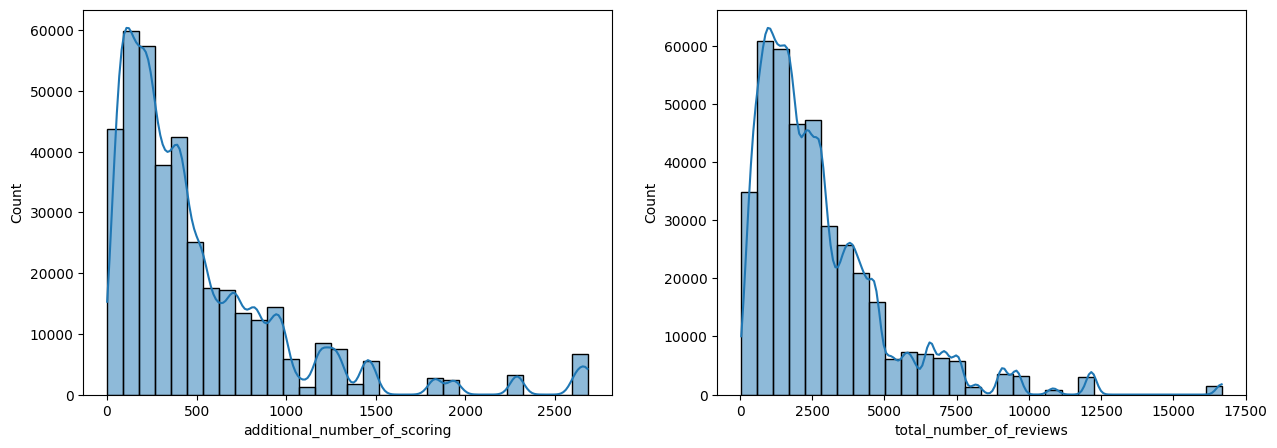

In [ ]:
# Посмотреи на распределеине признаков 'additional_number_of_scoring' и 'total_number_of_reviews'

n_data = hotel_data[['additional_number_of_scoring', 'average_score', 'total_number_of_reviews']]

fig, axes = plt.subplots(ncols=2, figsize=(15, 5))

ax1 = sns.histplot(n_data['additional_number_of_scoring'], bins=30, kde=True, ax = axes[0])

ax2 = sns.histplot(n_data['total_number_of_reviews'], bins=30, kde=True, ax = axes[1])


# отображаем гистограмму
plt.show()

**Визуально, признаки распределены не нормально**

### 3.3. Проведём статистический тест проверки на нормальность распределения признаков (тест Шапиро - Уилка)

In [625]:
# проводим тест Шапиро — Уилка

import scipy.stats as stats
col_names = list(n_data.columns)

#Словарь с выводом о нормальности/не нормальности по каждому признаку

finish = {}
for i in col_names:
    
    #Вероятность ошибки a = 0.05
    alpha = 0.05
    _, p = stats.shapiro(n_data[i])
    
    if p <= alpha:
        finish.update({i: 'Распределение не нормальное ({})'.format('p-value = %.3f' % (p))})
    else:
        finish.update({i: 'Распределение нормальное'})
        
for key, value in finish.items():
    print(f"{key}: {value}")

additional_number_of_scoring: Распределение не нормальное (p-value = 0.000)
total_number_of_reviews: Распределение не нормальное (p-value = 0.000)


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 386496.



*Признаки ***распределены не нормально****

### 3.4. Так как признаки распределены не нормально, а детальный анализ выбросов мы не провели,будем использовать в основном датасете *hotels_data* метод нормализации RobustScaler()

#### 3.4.1. Визуализируем несколько признаков до нормализации

<Axes: title={'center': 'Распределения до RobustScaler'}, ylabel='Density'>

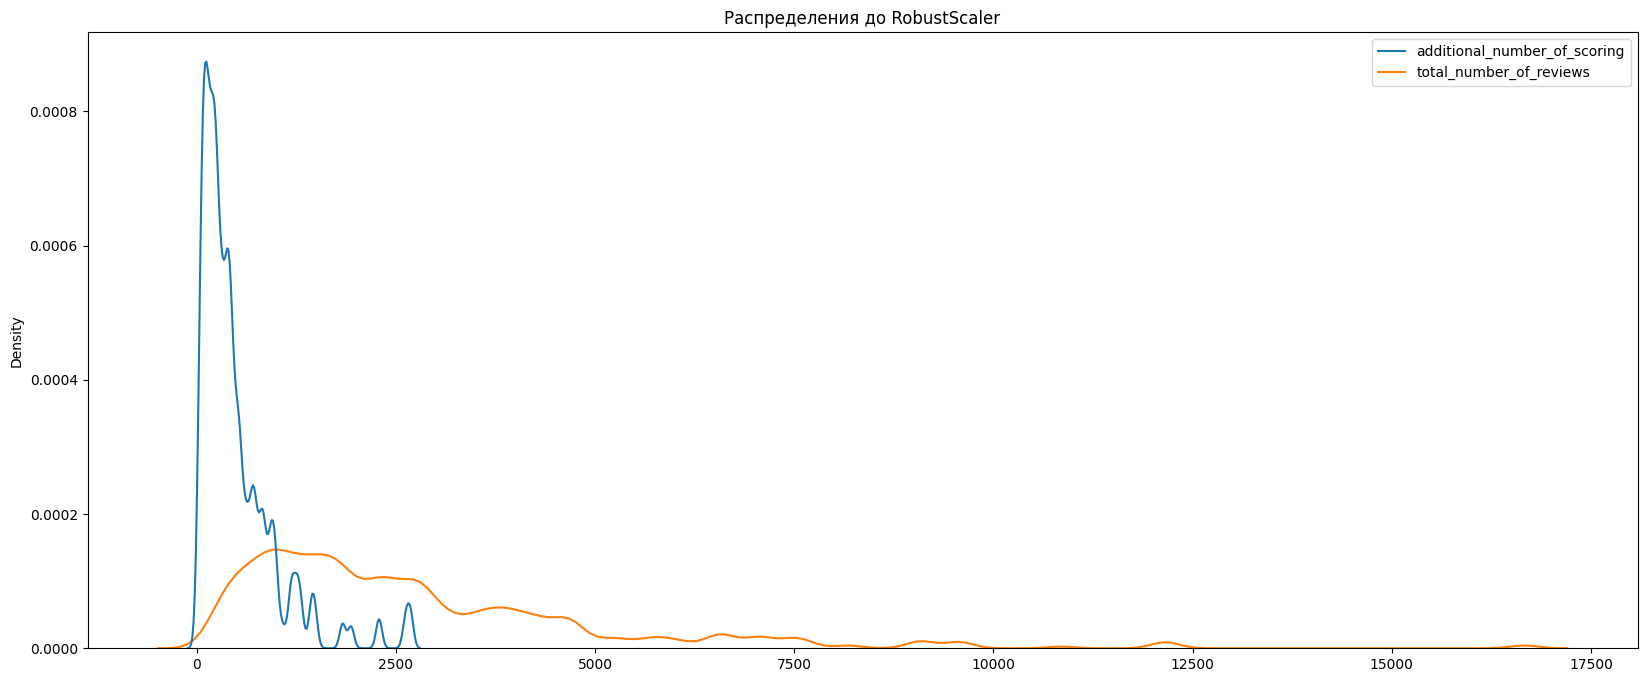

In [626]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(20, 8))
ax1.set_title('Распределения до RobustScaler')

sns.kdeplot(n_data, ax=ax1)

#### 3.4.2. Нормализируем признаки, запишем обновлённый датасет в переменную st_data

In [627]:
from sklearn import preprocessing

In [628]:
# инициализируем нормализатор RobustScaler
r_scaler = preprocessing.RobustScaler()

# кодируем исходный датасет
r_data = r_scaler.fit_transform(n_data)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
r_data = pd.DataFrame(r_data, columns=col_names)

#### 3.4.3. Визуализация признаков после нормализации

<Axes: title={'center': 'Распределения после RobustScaler'}, ylabel='Density'>

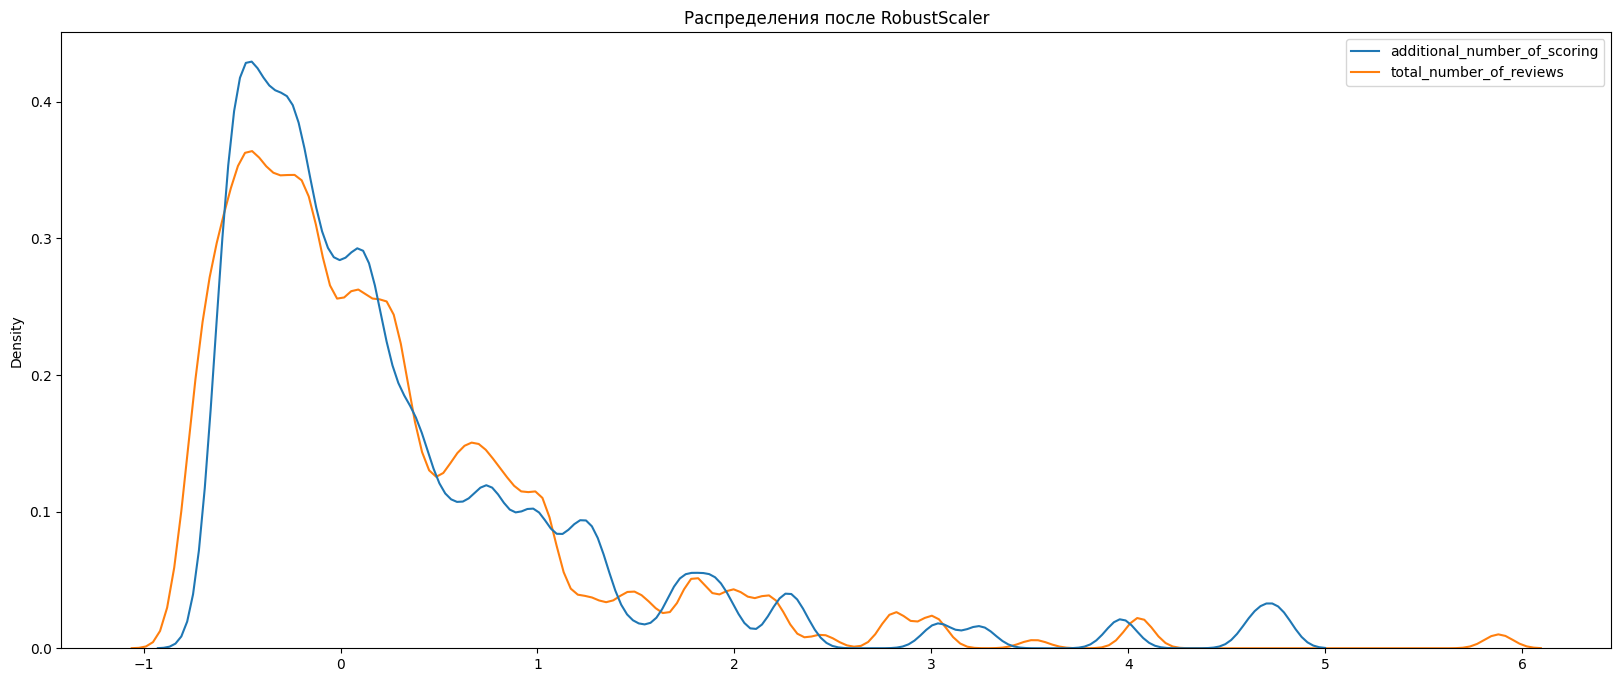

In [629]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(20, 8))
ax1.set_title('Распределения после RobustScaler')

sns.kdeplot(r_data, ax=ax1)


In [630]:

hotel_data = hotel_data.drop(['additional_number_of_scoring', 'total_number_of_reviews'], axis = 1)

In [631]:
hotel_data = pd.concat([r_data, hotel_data], axis = 1)

### Вывод по разделу 3:

1. Выполнена проверка на нормальность распределения признаков (визуальная и статистическая)
2. Выполенана стандартицация признаков
3. Выполнено визуальное сравнение признаков ДО и ПОСЛЕ стандартизации

## Раздел 4. Анализ корреляции признаков. Обучение модели

### 4.1. Визуальная оценка корреляции признаков

<Axes: >

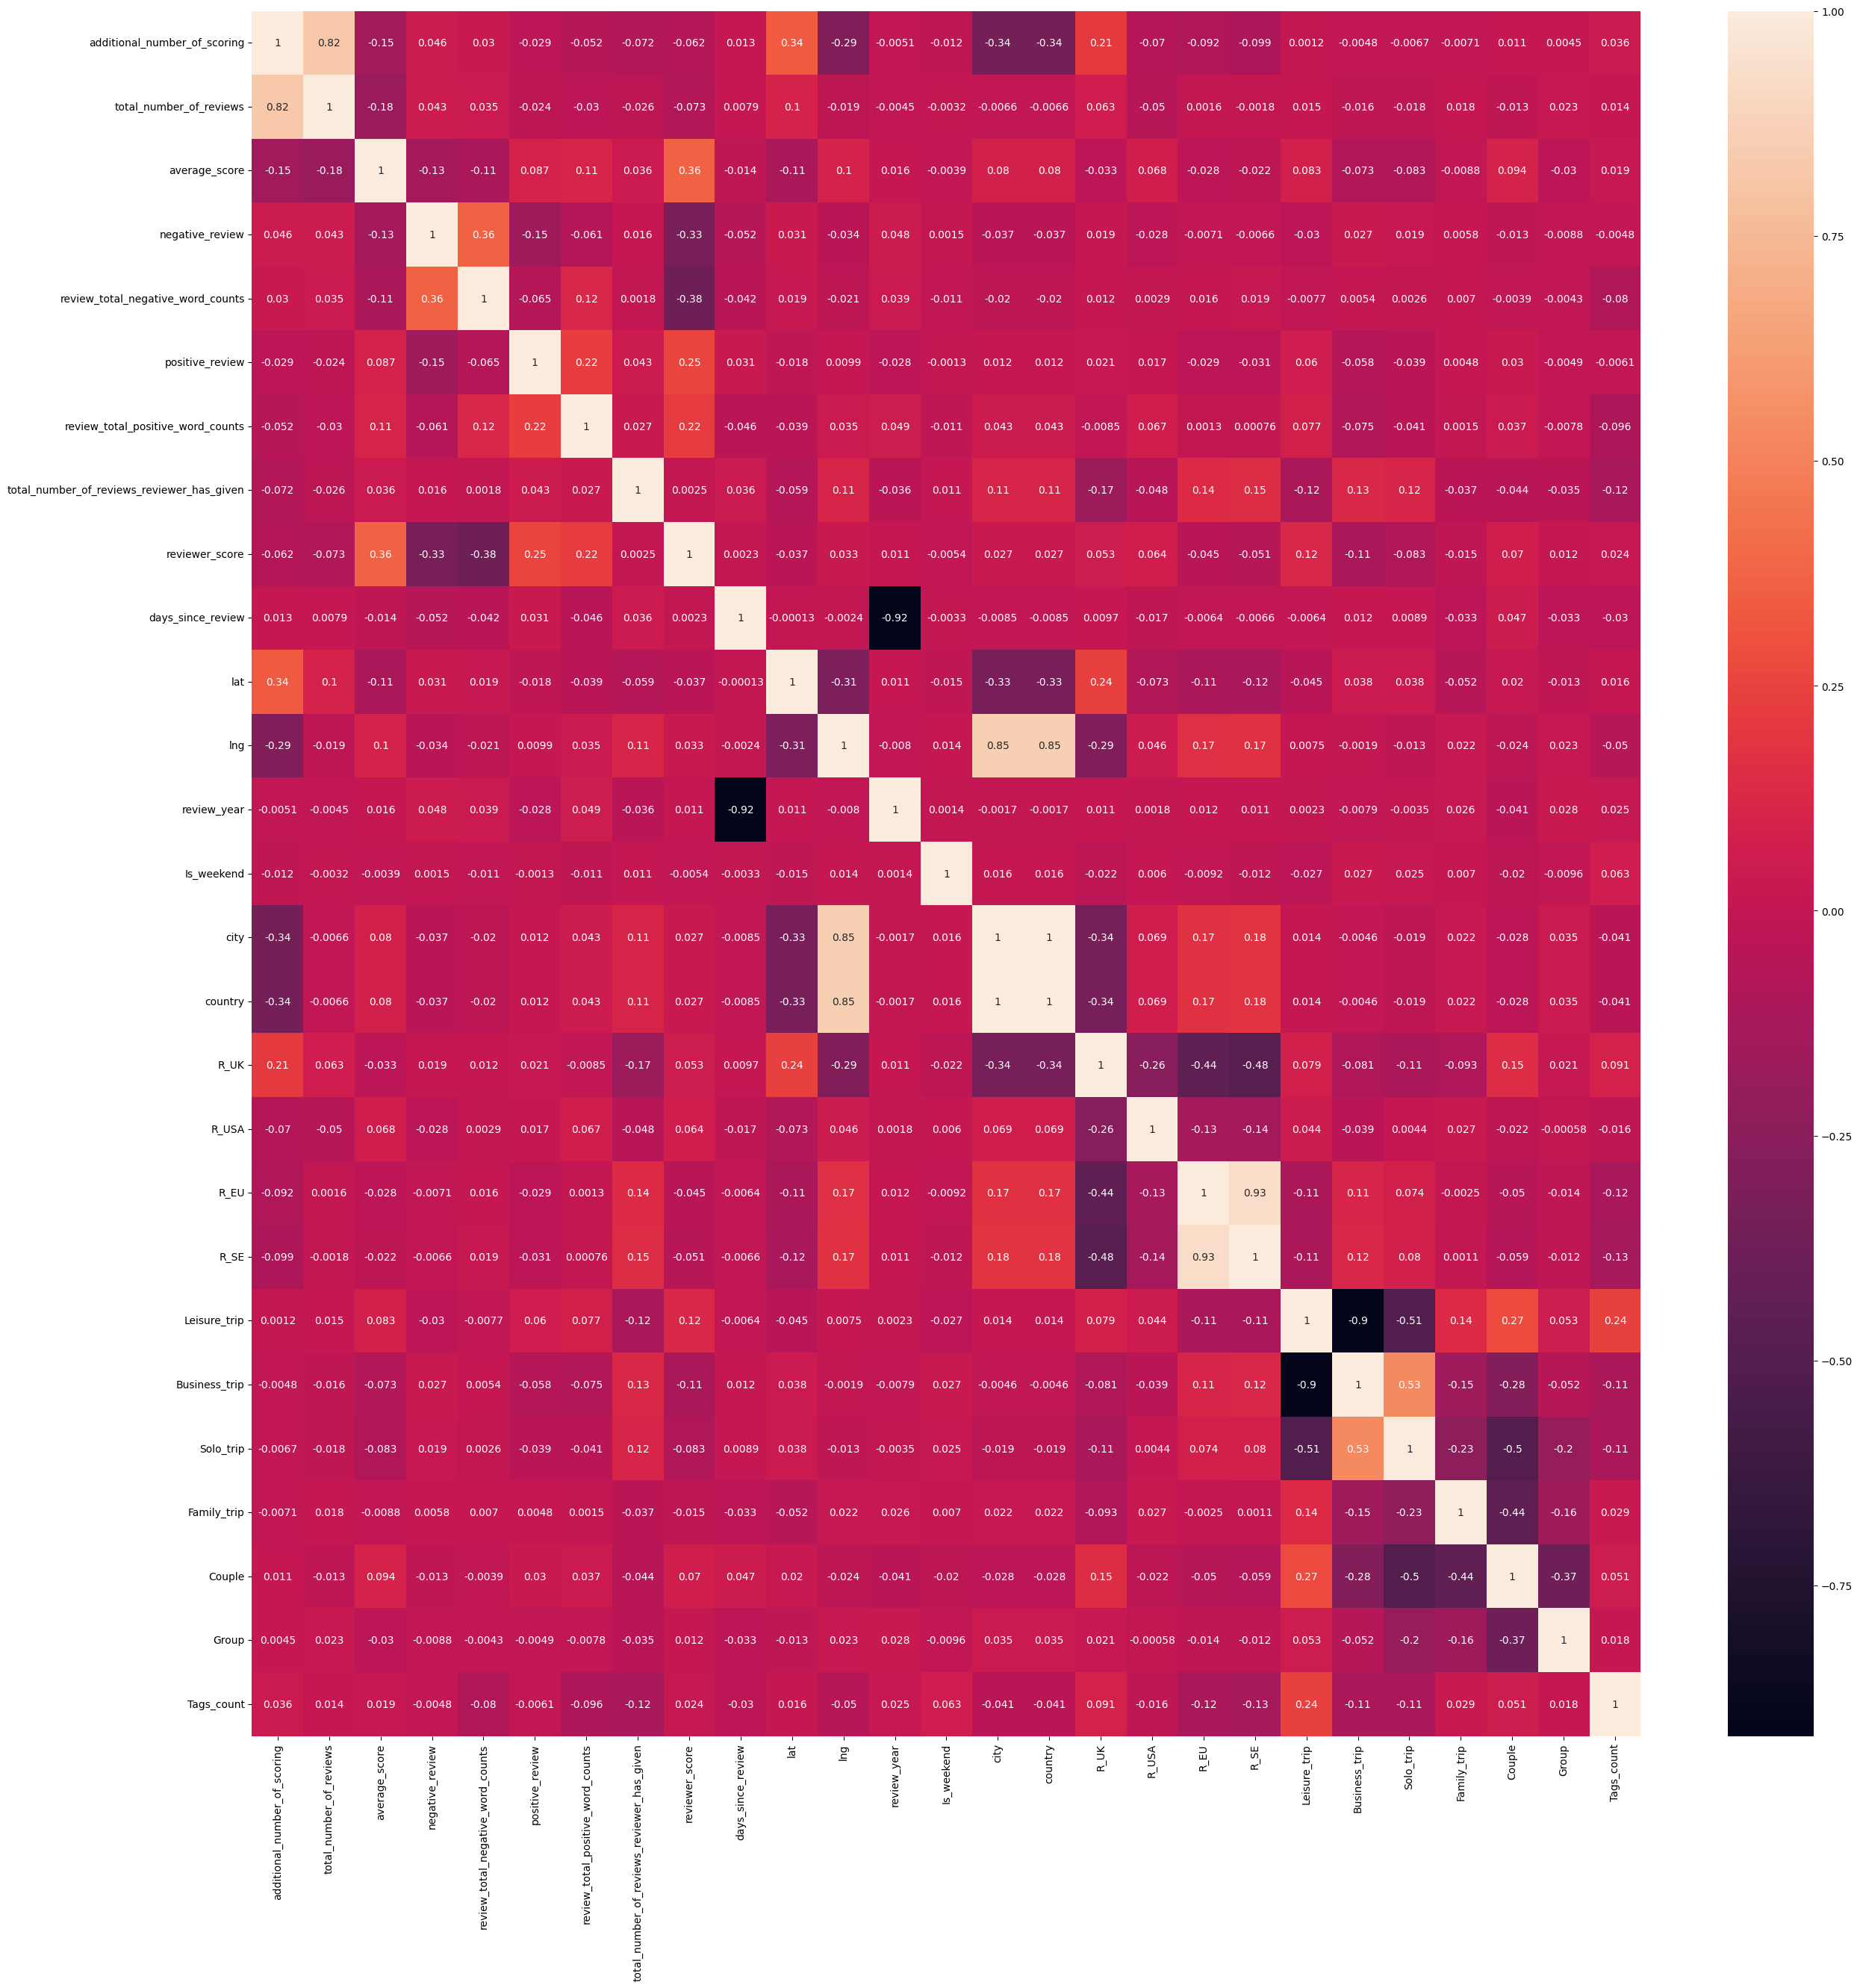

In [632]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(30, 30))
sns.heatmap(hotel_data.corr(numeric_only=True), annot=True)

### 4.2. Разделим признаки на категориалььные ипорядковые. Сделаем статистическую оценку значимостипризнаков

In [633]:
X_cat = hotel_data[['average_score', 'negative_review', 'positive_review', 'review_year', 'Is_weekend',
                    'city', 'country', 'R_UK', 'R_USA', 'R_EU', 'R_SE', 'Leisure_trip', 'Business_trip', 'Solo_trip', 'Family_trip', 'Couple', 'Group']]

X_num = hotel_data[['additional_number_of_scoring', 'total_number_of_reviews', 'days_since_review', 'review_total_negative_word_counts',
                            'review_total_positive_word_counts','total_number_of_reviews_reviewer_has_given','lat', 'lng', 'Tags_count']]

y = h_data['reviewer_score']

<Axes: >

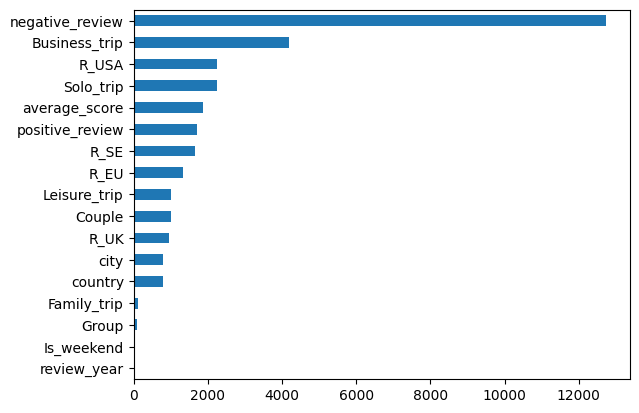

In [634]:
y=y.astype('int')

from sklearn.feature_selection import chi2 # хи-квадрат

imp_cat = pd.Series(chi2(X_cat, y)[0], index = X_cat.columns)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

<Axes: >

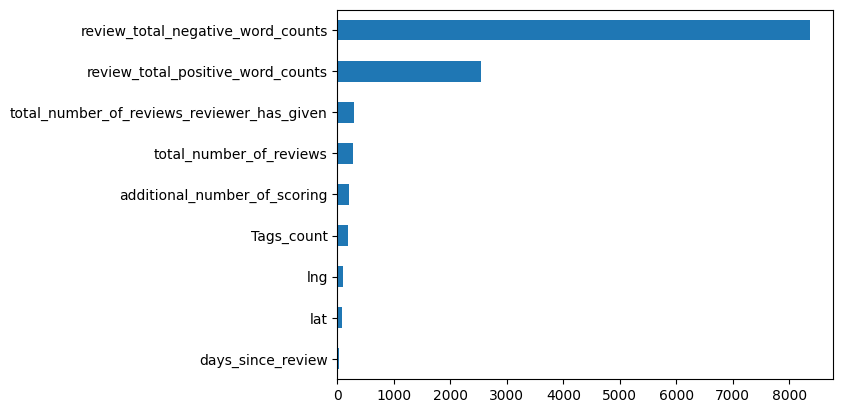

In [635]:
y=y.astype('int')

from sklearn.feature_selection import f_classif # хи-квадрат

imp_cat = pd.Series(f_classif(X_num, y)[0], index = X_num.columns)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

### 4.3. Обучение модели

In [ ]:
# Загружаем специальный инструмент для разбивки:
from sklearn.ensemble import RandomForestRegressor  


from sklearn.model_selection import train_test_split  

In [604]:
hotel_data.columns

Index(['additional_number_of_scoring', 'total_number_of_reviews',
       'days_since_review', 'average_score', 'negative_review',
       'review_total_negative_word_counts', 'positive_review',
       'review_total_positive_word_counts',
       'total_number_of_reviews_reviewer_has_given', 'reviewer_score', 'lat',
       'lng', 'review_year', 'Is_weekend', 'city', 'country', 'R_UK', 'R_USA',
       'R_EU', 'R_SE', 'Leisure_trip', 'Business_trip', 'Solo_trip',
       'Family_trip', 'Couple', 'Group', 'Tags_count'],
      dtype='object')

In [641]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х — данные с информацией об отелях, у — целевая переменная (рейтинги отелей)  
X = hotel_data.drop(['reviewer_score'], axis = 1)
y = hotel_data['reviewer_score']

# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" — для тестирования.  
# Для тестирования мы будем использовать 25 % от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
      
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)
predict_submission = regr.predict(X)

In [642]:

# Сравниваем предсказанные значения (y_pred) с реальными (y_test) и смотрим, насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений в отношении фактических.  
print('MAPE:', round(metrics.mean_absolute_percentage_error(y_test, y_pred), 4))

MAPE: 0.1362


In [ ]:
sample_submission['reviewer_score'] = predict_submission

np.float64(9.720999999999998)